# Predicting Adult income from the UCI Adult dataset

In [1]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import OrdinalEncoder
from imblearn.ensemble import BalancedRandomForestClassifier

print("---------Successfully imported all libraries---------")

---------Successfully imported all libraries---------


In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The dataset contains demographic information along with the income level for a person.

In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.income.value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

The data is imbalanced with significantly more records for the class '<=50k'.

In [9]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Upon manual inspection of the dataset, we observe that the missing data is in form of '?' instead of NaN. This is resolved by substituting the '?' for NaN, and calculating the percentage of missing values.

In [10]:
df= df.replace('?', np.nan)
missing_values = df.isna().sum()  
print(missing_values)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [11]:
for c in df.columns:

    column_nan = df[c].isna().sum()

    if column_nan >0:
        print (c)
        print ("{0:.2f}%".format(float(column_nan) / df.shape[0] * 100))
        print ("\n")

workclass
5.73%


occupation
5.75%


native-country
1.75%




Since the percentage of the missing columns is not significant (~5% per feature), as compared to the size of the dataset, deleting the affected rows is acceptable.

In [12]:
df.dropna(inplace=True)

df.shape

(45222, 15)

In [13]:
df = df.drop_duplicates()
df.shape

(45175, 15)

In [14]:
# Understanding data distribution

In [15]:
df['native-country'].value_counts()

native-country
United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

<Axes: title={'center': 'Native country counts'}, xlabel='native-country'>

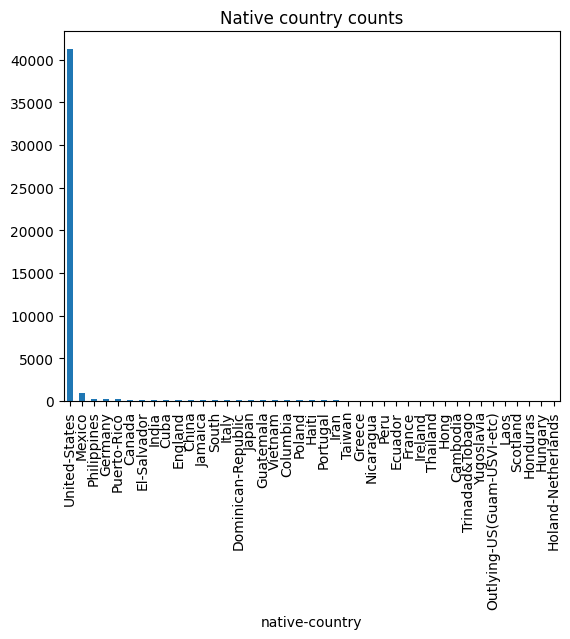

In [16]:
df["native-country"].value_counts().plot.bar(title="Native country counts")

In [17]:
def country_mapping_function(value):
    if value == 'United-States':
        return 'United-States'
    else:
        return 'Non-US'

df['native-country'] = df['native-country'].map(country_mapping_function)
 

In [18]:
# Analysis for marital-status

df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

<Axes: title={'center': 'Marital status & income'}, xlabel='marital-status'>

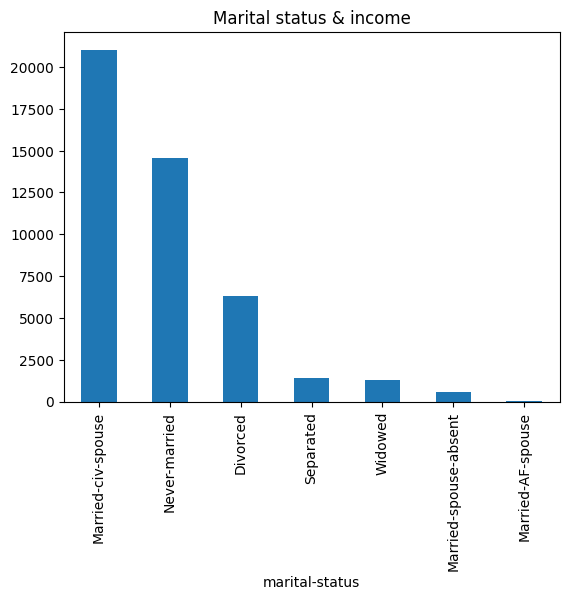

In [19]:
df["marital-status"].value_counts().plot.bar(title="Marital status & income")

In [20]:
groups = {
    'Never-married': ["Never-married"],
    
    'Married': ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"],
    
    'Prev-married': ["Divorced", "Widowed", "Separated"]
}

flat_mapping = {val: key for key, values in groups.items() for val in values}

df['marital-status'] = df['marital-status'].map(flat_mapping)

In [21]:
# Analysis for workclass

df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

<Axes: title={'center': 'Workclass'}, xlabel='workclass'>

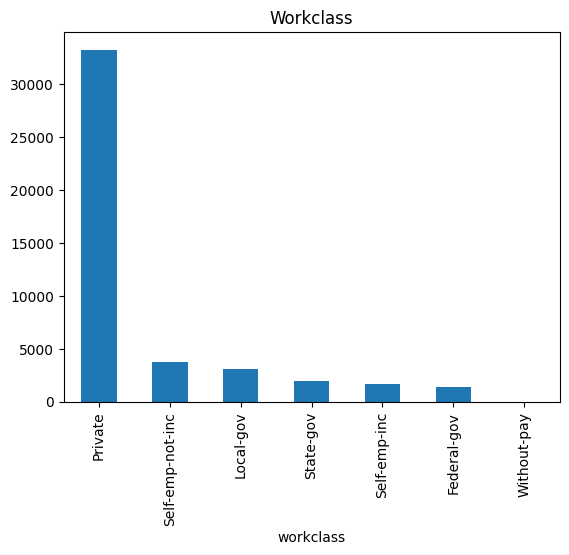

In [22]:
df["workclass"].value_counts().plot.bar(title="Workclass")

In [23]:
groups = {
    'Private': ["Private"],
    
    'Govt': ["Local-gov", "State-gov", "Federal-gov"],
    
    'Self-emp': ["Self-emp-inc", "Self-emp-not-inc"],

    'Without-pay': ["Without-pay"]
}

flat_mapping = {val: key for key, values in groups.items() for val in values}

df['workclass'] = df['workclass'].map(flat_mapping)

In [24]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


In [25]:
# Analysis for education

df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

<Axes: title={'center': 'Education counts'}, xlabel='education'>

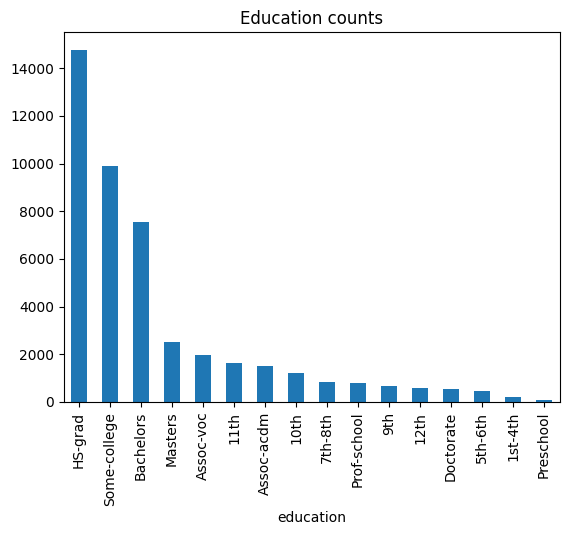

In [26]:
df["education"].value_counts().plot.bar(title="Education counts")

In [27]:
groups = {
    'School-dropout': ["11th", '10th',
        '7th-8th', '5th-6th',
       '9th', '12th', '1st-4th', 'Preschool'],
    
    'HS-grad': ["HS-grad"],

    'Some-college': ["Some-college"],
    
    'Associate-deg': ["Assoc-acdm", "Assoc-voc"],
    
    'College-graduate': ["Prof-school", "Bachelors", "Masters","Doctorate" ]
}

flat_mapping = {val: key for key, values in groups.items() for val in values}

df['education'] = df['education'].map(flat_mapping)

In [28]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
        2597,  2907,  4650,  6497,  5013, 27828,  4934,  4064,  3674,
        2174, 10605, 99999,  1055,   114,  2580,  3411,  4508,  4386,
        8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471, 10566,
        2354,  1424,  1455,  3325,  4416, 25236,  4787,  2829,  4865,
        1264,  1506,   594, 10520,  3464, 20051,  4101,  1797,  2407,
        3471,  2653,  1086,  1848, 14344,  1151,  2993,  2290, 15020,
        9386,  2202,  3818,  2176,  5455,  3418, 11678,  7978,  7262,
        6514, 41310,  3456,  7430,  2062, 34095,  1831,  6723,  5060,
       15831,  2977,  2346,  3273,  2329,  9562,  2105,  2635,  2414,
        4931,  1731,  6097,   914,  7896,  5556,  3781,  3942,  2538,
        3887,  1409, 25124,  7443,  5721,   401,  1173,  4687,  6767,
         991,  2036,  2050,  2961,  2228, 22040,  2936,  6360,  2009,
        3432,  1639, 18481,  2387])

Given the highly skewed distributions of capital gain and loss, a binary feature was introduced to indicate whether any capital gain or loss is present.

In [29]:
def capital_gain_mapping_function(value):
    if value >0:
        return 1
    else:
        return 0

df['has-capital-gain'] = df['capital-gain'].map(capital_gain_mapping_function)


In [30]:
# Logarithmic scaling

In [31]:
df['capital_gain_log'] = np.log1p(df['capital-gain'])
df['capital_loss_log'] = np.log1p(df['capital-loss'])

<Axes: title={'center': '#gender'}, xlabel='gender'>

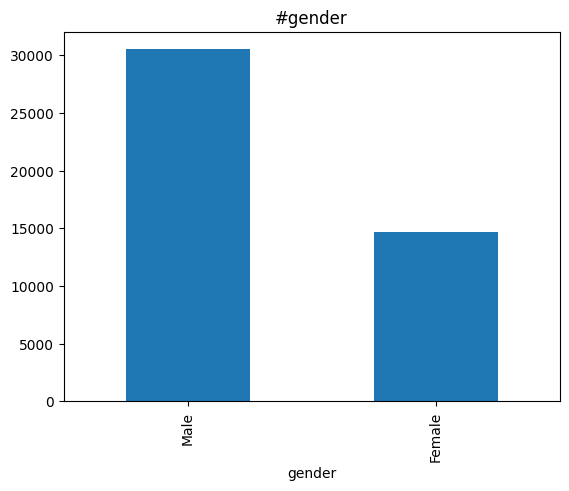

In [32]:
df["gender"].value_counts().plot.bar(title="#gender")

<Axes: title={'center': '#occupation'}, xlabel='occupation'>

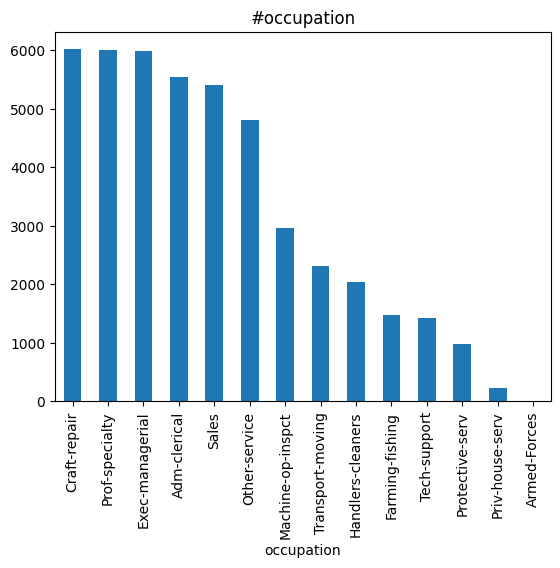

In [33]:
df["occupation"].value_counts().plot.bar(title="#occupation")

Several numerical features exhibit skewed and highly imbalanced distributions. To improve stability and interpretability, values with low frequency were grouped into broader bins. This binning strategy reduces sparsity, mitigates the impact of extreme values, and results in more uniform feature distributions for downstream modeling.

In [34]:
# Visualizing the relationship between different features and income 

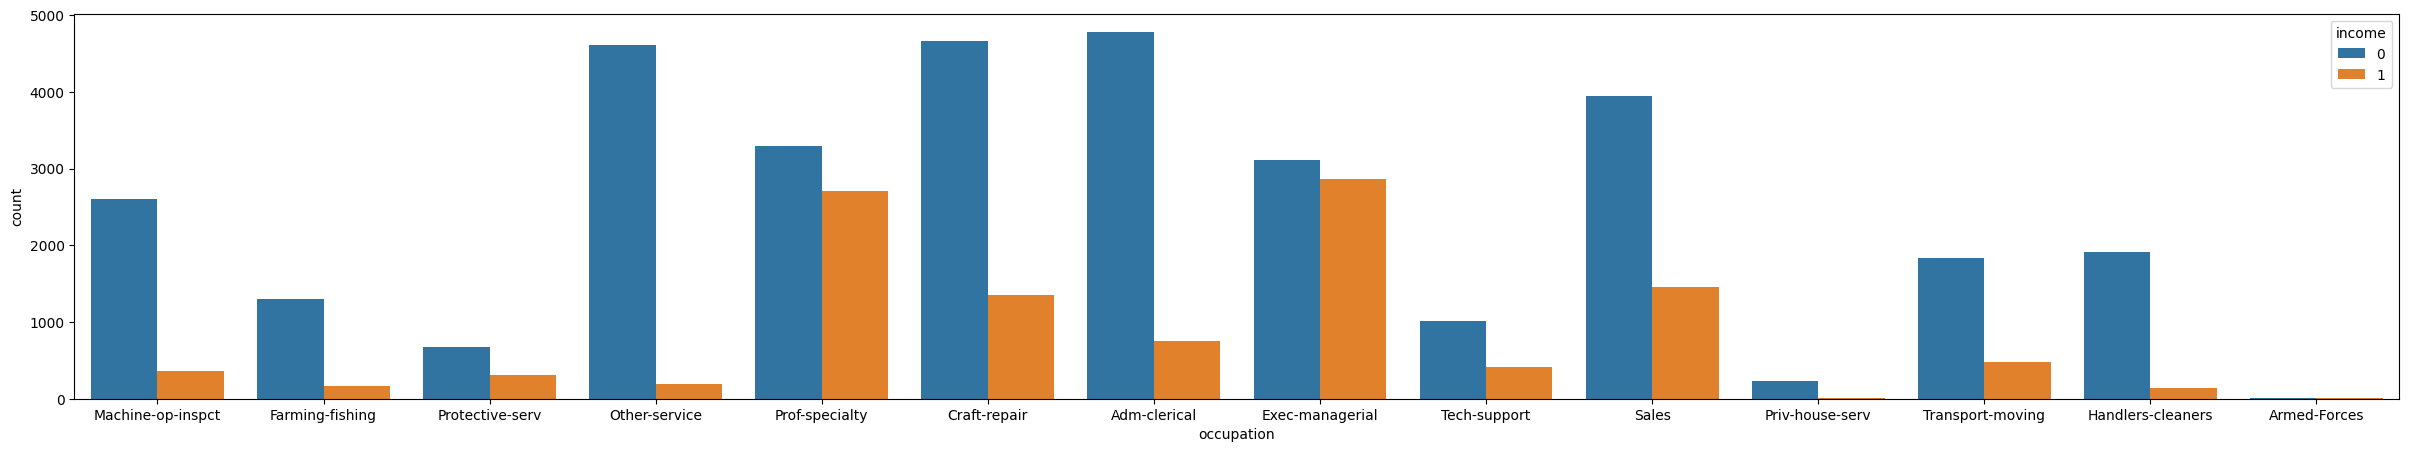

In [35]:
plt.figure(figsize=(30, 5))
sns.countplot(data=df, x='occupation', hue='income')
plt.show()

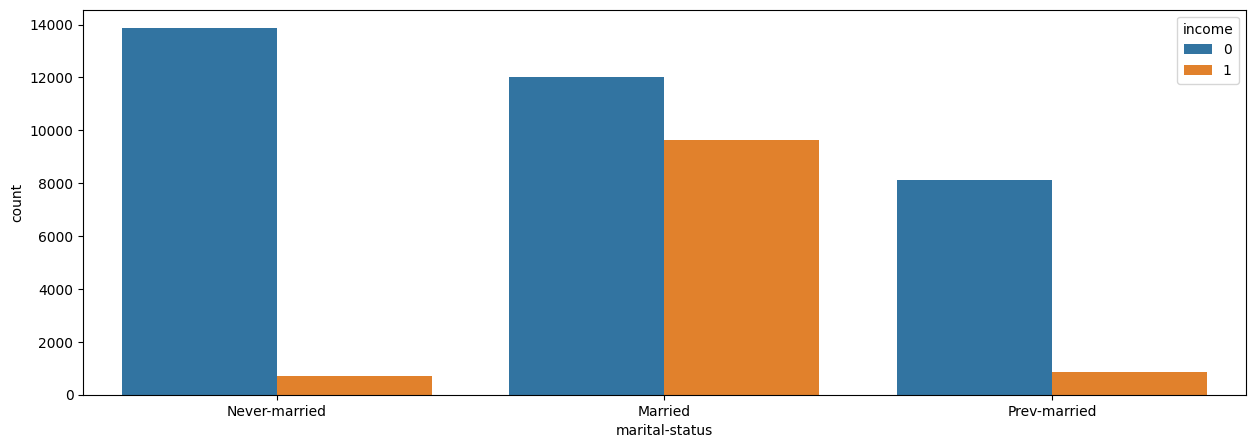

In [36]:

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='marital-status', hue='income')
plt.show()


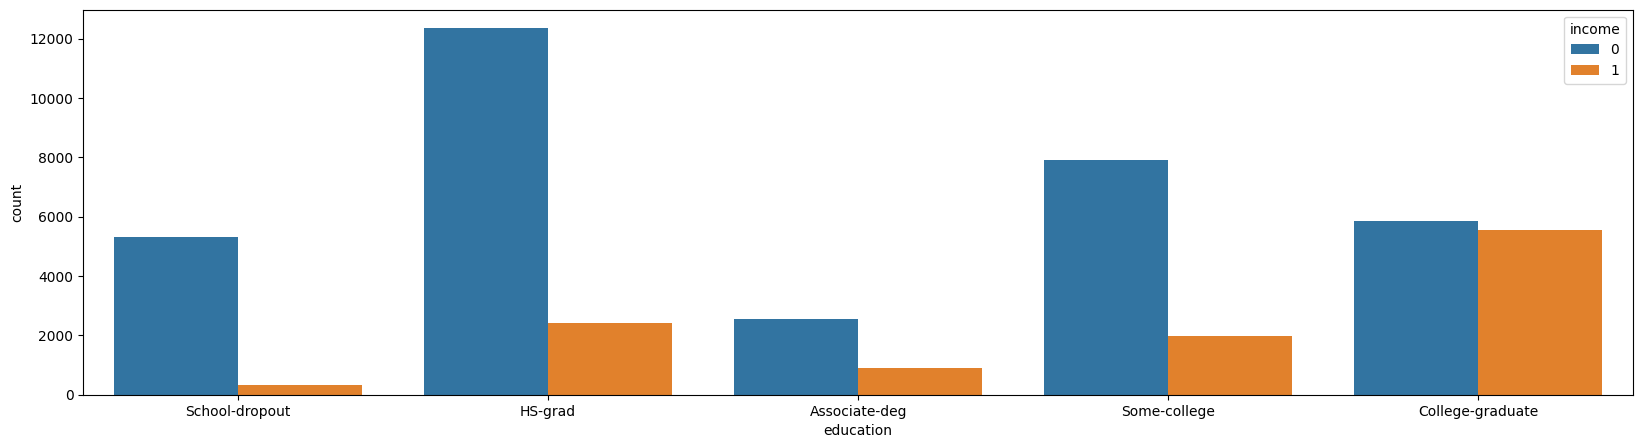

In [37]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='education', hue='income')
plt.show()

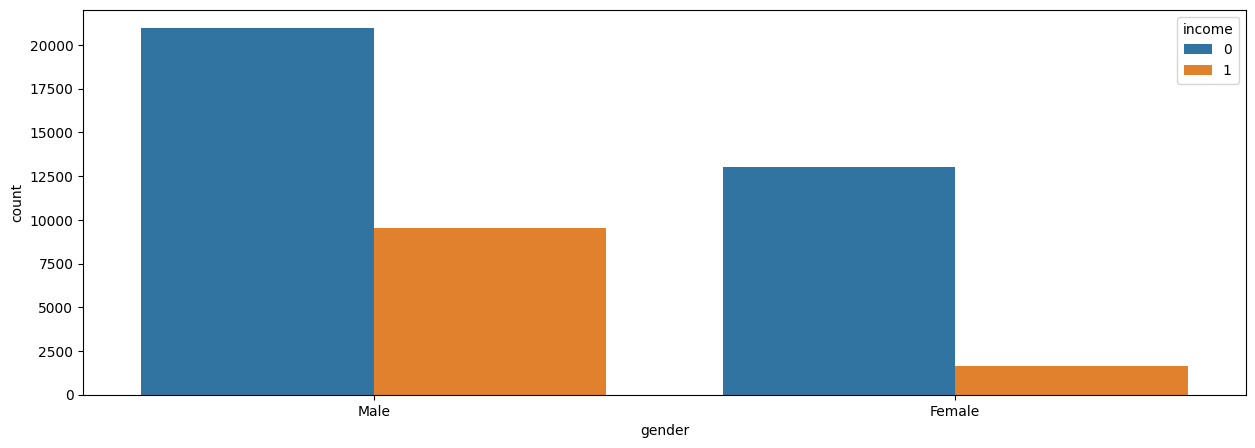

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='gender', hue='income')
plt.show()

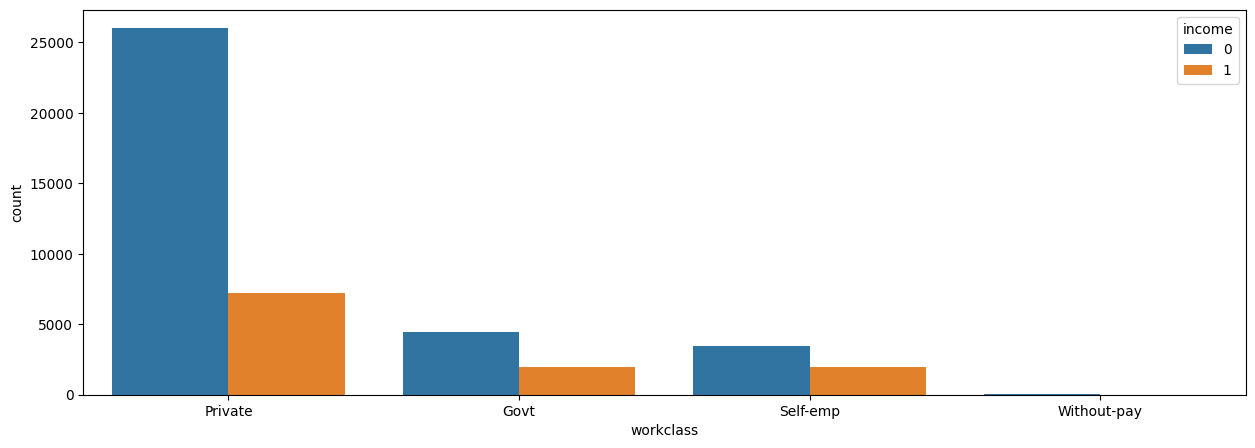

In [39]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='workclass', hue='income')
plt.show()

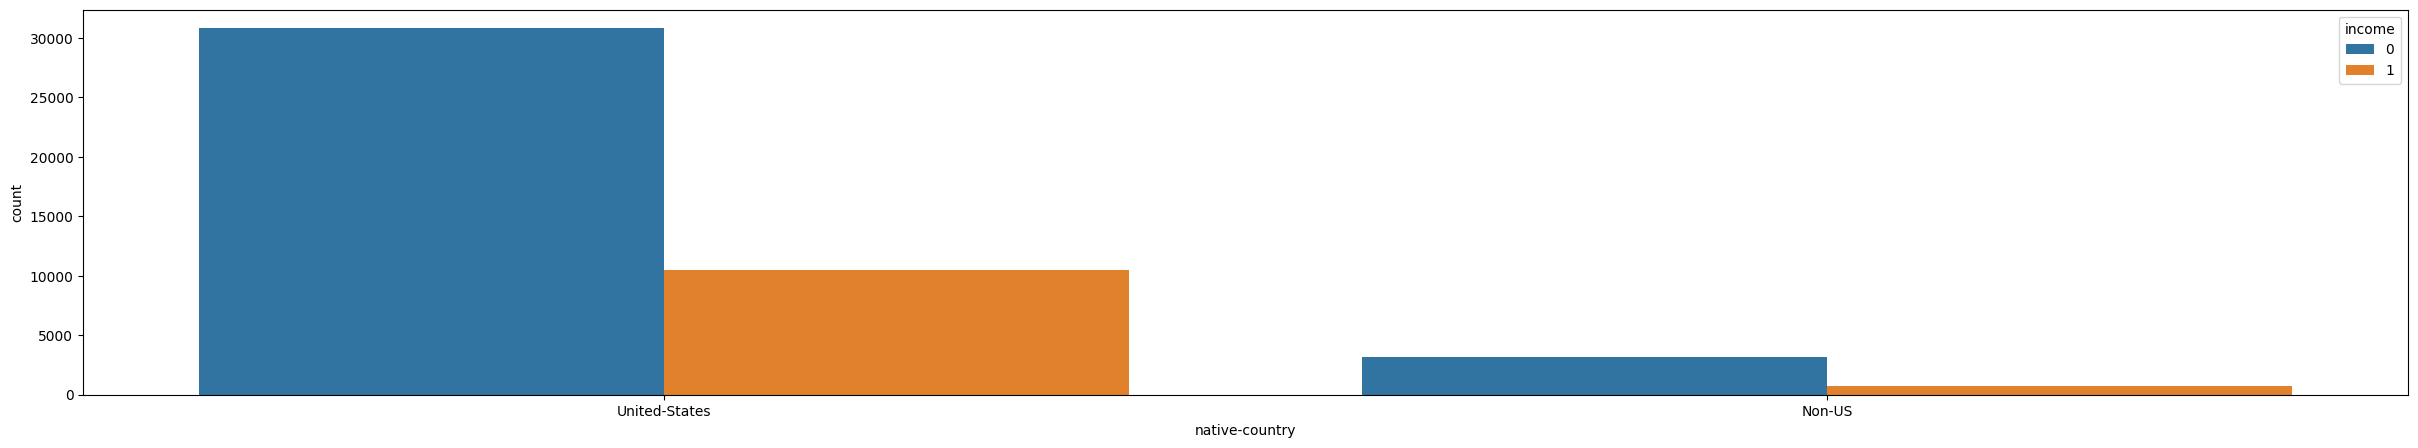

In [40]:
plt.figure(figsize=(30, 5))
sns.countplot(data=df, x='native-country', hue='income')
plt.show()

In [ ]:
plt.figure(figsize=(20, 25))
sns.pairplot(df.iloc[: ,:], hue="income")
plt.show()

In [ ]:
df = df.drop(['fnlwgt'], axis = 1)
df = df.drop(['educational-num'], axis = 1)

In [ ]:
df.head()

In [ ]:
y=df['income']
X=df.drop(['income'], axis = 1)

In [ ]:
y.shape


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42) 

In [ ]:
# Encoding before fitting model
categorical_cols = X_train.select_dtypes(include=['object']).columns

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[categorical_cols] = oe.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = oe.transform(X_test[categorical_cols])


In [ ]:
X_train.shape

In [ ]:
# The hyperparameters are adjusted, keeping in mind the unbalanced nature of dataset

In [ ]:
model = BalancedRandomForestClassifier(n_estimators=1000,max_features=0.5, sampling_strategy=0.4,replacement=True,max_depth=15, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()